In [1]:
import pandas as pd
import json
import tikzplotlib

In [2]:
df = pd.read_csv('train-positive-pairs.csv')
df.ingredients = df.ingredients.map(json.loads)
df.directions = df.directions.map(json.loads)
df.head()

,title,ingredients,directions,link,source
0,Kale Carrot And Apple Calcium Booster Juice Fo...,"[2 kale leaves, 2 celery ribs, 1/3 cup parsley...",[Wash and cut each vegetable and feed through ...,www.food.com/recipe/kale-carrot-and-apple-calc...,Gathered
1,Chocolade Pudding - Chocolate Pudding,"[1 cup milk, 1 ounce chocolate, 1/2 cup sugar,...",[Heat milk with chocolate in the top of a doub...,www.food.com/recipe/chocolade-pudding-chocolat...,Gathered
2,Haluski,"[1 cabbage, green, core removed and leaves sep...",[Bring a large pot of water to a boil. Add the...,www.food.com/recipe/haluski-407129,Gathered
3,Cajun Style White Bean Soup,"[8 ounces great northern beans, water, to cove...","[Put rinsed beans, in a 4 quart dutch oven and...",www.food.com/recipe/cajun-style-white-bean-sou...,Gathered
4,Toddler Tamer Tea,"[1 chamomile tea bag, 2 tablespoons honey, 4 o...","[Place the tea bag in a microwave safe cup., C...",www.food.com/recipe/toddler-tamer-tea-188781,Gathered


In [3]:
import re
pattern = re.compile('[0-9]{1}/[0-9]{1,2}')
pattern.findall('12/13 + 1/2 + 1/123')

['2/13', '1/2', '1/12']

In [4]:
def number_of_fractions_in_line(arg: list) -> int:
    s = ' '.join(arg)
    p = re.compile('[0-9]{1}/[0-9]{1,2}')
    return len(p.findall(s))

In [5]:
df.insert(len(df.columns), 'directions_count', df.directions.map(len))
df.insert(len(df.columns), 'fractions_count', df.ingredients.map(number_of_fractions_in_line))

In [6]:
gathered = df.loc[df.source == 'Gathered']
rec1M = df.loc[df.source == 'Recipes1M']
assert gathered.shape == rec1M.shape

# Number of directions

In [7]:
test = gathered.join(rec1M.set_index('link'), on='link', lsuffix='_gathered', rsuffix='_rec1M')
test = test.drop(columns=['source_gathered', 'source_rec1M'])
test.head()

,title_gathered,ingredients_gathered,directions_gathered,link,directions_count_gathered,fractions_count_gathered,title_rec1M,ingredients_rec1M,directions_rec1M,directions_count_rec1M,fractions_count_rec1M
0,Kale Carrot And Apple Calcium Booster Juice Fo...,"[2 kale leaves, 2 celery ribs, 1/3 cup parsley...",[Wash and cut each vegetable and feed through ...,www.food.com/recipe/kale-carrot-and-apple-calc...,1,1,Kale Carrot and Apple Calcium Booster Juice fo...,"[2 kale leaves, 2 celery ribs, 13 cup parsley,...",[Wash and cut each vegetable and feed through ...,1,0
1,Chocolade Pudding - Chocolate Pudding,"[1 cup milk, 1 ounce chocolate, 1/2 cup sugar,...",[Heat milk with chocolate in the top of a doub...,www.food.com/recipe/chocolade-pudding-chocolat...,5,3,Chocolade Pudding - Chocolate Pudding,"[1 cup milk, 1 ounce chocolate, 12 cup sugar, ...",[Heat milk with chocolate in the top of a doub...,5,0
2,Haluski,"[1 cabbage, green, core removed and leaves sep...",[Bring a large pot of water to a boil. Add the...,www.food.com/recipe/haluski-407129,3,1,Haluski,"[1 cabbage, green, core removed and leaves sep...","[Bring a large pot of water to a boil., Add th...",8,0
3,Cajun Style White Bean Soup,"[8 ounces great northern beans, water, to cove...","[Put rinsed beans, in a 4 quart dutch oven and...",www.food.com/recipe/cajun-style-white-bean-sou...,3,5,Cajun Style White Bean Soup,"[8 ounces great northern beans, water, to cove...","[Put rinsed beans, in a 4 quart dutch oven and...",8,0
4,Toddler Tamer Tea,"[1 chamomile tea bag, 2 tablespoons honey, 4 o...","[Place the tea bag in a microwave safe cup., C...",www.food.com/recipe/toddler-tamer-tea-188781,8,0,Toddler Tamer Tea,"[1 chamomile tea bag, 2 tablespoons honey, 4 o...","[Place the tea bag in a microwave safe cup., C...",8,0


In [8]:
uneven = test.loc[test.apply(lambda row: row.directions_count_gathered != row.directions_count_rec1M , axis=1)]
uneven.head()

,title_gathered,ingredients_gathered,directions_gathered,link,directions_count_gathered,fractions_count_gathered,title_rec1M,ingredients_rec1M,directions_rec1M,directions_count_rec1M,fractions_count_rec1M
2,Haluski,"[1 cabbage, green, core removed and leaves sep...",[Bring a large pot of water to a boil. Add the...,www.food.com/recipe/haluski-407129,3,1,Haluski,"[1 cabbage, green, core removed and leaves sep...","[Bring a large pot of water to a boil., Add th...",8,0
3,Cajun Style White Bean Soup,"[8 ounces great northern beans, water, to cove...","[Put rinsed beans, in a 4 quart dutch oven and...",www.food.com/recipe/cajun-style-white-bean-sou...,3,5,Cajun Style White Bean Soup,"[8 ounces great northern beans, water, to cove...","[Put rinsed beans, in a 4 quart dutch oven and...",8,0
7,Risotto Coi Frutti Di Mare (Risotto With Seafood),"[1 lb small squid, cleaned and chopped into 1/...",[Separate the cleaned shrimp in two equal port...,www.food.com/recipe/risotto-coi-frutti-di-mare...,13,5,Risotto Coi Frutti Di Mare (Risotto With Seafood),"[1 lb small squid, cleaned and chopped into 1/...",[Separate the cleaned shrimp in two equal port...,29,1
8,Spinach With Sesame And Miso,"[2 1/2 tablespoons sesame seeds, 2 tablespoons...",[Heat a wok or frying pan and add the sesame s...,www.food.com/recipe/spinach-with-sesame-and-mi...,10,3,Spinach With Sesame and Miso,"[2 12 tablespoons sesame seeds, 2 tablespoons ...",[Heat a wok or frying pan and add the sesame s...,11,0
9,Easy Raw Chocolate Bark,[2 tablespoons raw organic coconut oil (soften...,"[Well combine all ingredients., Taste mixture ...",www.food.com/recipe/easy-raw-chocolate-bark-49...,6,1,Easy Raw Chocolate Bark,[2 tablespoons raw organic coconut oil (soften...,"[Well combine all ingredients., Taste mixture ...",7,0


In [9]:
print(uneven.shape)
print(test.shape)

(224088, 11)
(350141, 11)


In [10]:
# save sample of 100 recipes for manual checkup
test.sample(n=100, random_state=0).to_csv('manual-checkup-sample.csv', index=False)

In [11]:
import nltk
nltk.download('punkt')
from nltk import tokenize

[nltk_data] Downloading package punkt to /home/wojtek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
test.loc[test.apply(lambda row: len(tokenize.sent_tokenize(' '.join(row.directions_gathered))) != row.directions_count_rec1M , axis=1)].shape

(50209, 11)

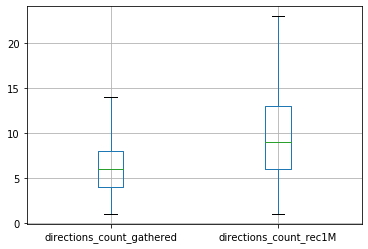

In [13]:
test[['directions_count_gathered', 'directions_count_rec1M']].boxplot(sym='')

In [14]:
experiment = test.apply(lambda row: len(tokenize.sent_tokenize(' '.join(row.directions_gathered))), axis=1)

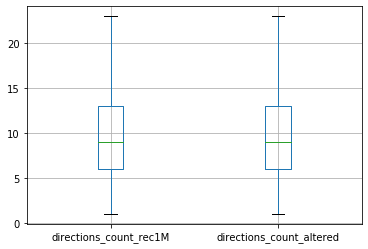

In [15]:
pd.DataFrame(data={
    'directions_count_rec1M': test.directions_count_rec1M,
    'directions_count_altered': experiment
}).boxplot(sym='')

In [16]:
import matplotlib
from matplotlib.pyplot import hist
from matplotlib.pyplot import boxplot
import matplotlib.pyplot as plt

%matplotlib inline

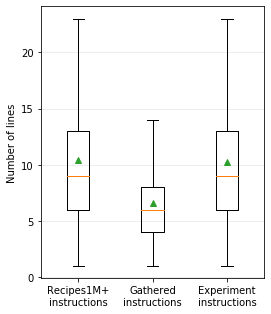

In [17]:
data = [
    test.directions_count_rec1M,
    test.directions_count_gathered,
    experiment
]

fig, ax1 = plt.subplots(figsize=(4, 5))
fig.canvas.set_window_title('A Boxplot Example')
# fig.subplots_adjust(left=0.125, right=1, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='', vert=1, whis=1.5, showmeans=True)
# plt.setp(bp['boxes'], color='black')
# plt.setp(bp['whiskers'], color='black')
# plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
# ax1.set_title('Comparison of counts distribution\nbetween datasets')
# ax1.set_xlabel('Ditribution')
ax1.set_ylabel('Number of lines')

ax1.set_xticklabels(['Recipes1M+\ninstructions', 'Gathered\ninstructions', 'Experiment\ninstructions'])

plt.savefig('distr-comparison-issue.png', dpi=600)
tikzplotlib.save('distr-comparison-issue.tex')
plt.show()

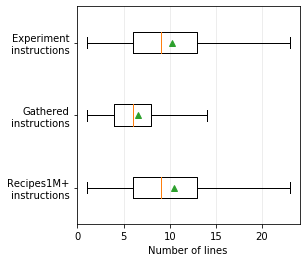

In [18]:
data = [
    test.directions_count_rec1M,
    test.directions_count_gathered,
    experiment
]

fig, ax1 = plt.subplots(figsize=(4, 4))
fig.canvas.set_window_title('A Boxplot Example')
# fig.subplots_adjust(left=0.125, right=1, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='', vert=0, whis=1.5, showmeans=True)
# plt.setp(bp['boxes'], color='black')
# plt.setp(bp['whiskers'], color='black')
# plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.xaxis.grid(True, linestyle='-', which='major', color='lightgrey',alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
# ax1.set_title('Comparison of counts distribution\nbetween datasets')
# ax1.set_xlabel('Ditribution')
ax1.set_xlabel('Number of lines')

ax1.set_yticklabels(['Recipes1M+\ninstructions', 'Gathered\ninstructions', 'Experiment\ninstructions'])

plt.savefig('distr-comparison-issue-horizontal.png', dpi=600)
tikzplotlib.save('distr-comparison-issue-horizontal.tex')
plt.show()

In [19]:
test.directions_count_rec1M.describe()

count    350141.000000
mean         10.416412
std           6.704046
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max         167.000000
Name: directions_count_rec1M, dtype: float64

In [20]:
test.directions_count_gathered.describe()

count    350141.000000
mean          6.559149
std           4.275013
min           1.000000
25%           4.000000
50%           6.000000
75%           8.000000
max         107.000000
Name: directions_count_gathered, dtype: float64

In [21]:
experiment.describe()

count    350141.000000
mean         10.281432
std           6.550033
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max         126.000000
dtype: float64

In [44]:
import numpy as np
from scipy.stats import ttest_rel, ttest_ind
sample_size = 10000
rng = np.random.default_rng(0)
indexes = rng.choice(test.shape[0], size=sample_size)
# print(indexes.shape)

# gathered and recipes1m+ distribution differences
stat, p = ttest_ind(test.directions_count_rec1M.iloc[indexes], test.directions_count_gathered.iloc[indexes])
print('Gathered vs Recipes1M+')
print('p=',p)
print('stat=',stat)

print('---------------')

# experiment anr recipes1M+ distribution differences
stat, p = ttest_ind(test.directions_count_rec1M.iloc[indexes], experiment.iloc[indexes])
print('Experiment vs Recipes1M+')
print('p=',p)
print('stat=',stat)

print('---------------')

# measures impact of experiment
stat, p = ttest_rel(test.directions_count_gathered.iloc[indexes], experiment.iloc[indexes])
print('Experiment vs Gathered')
print('p=',p)
print('stat=',stat)

Gathered vs Recipes1M+
p= 0.0
stat= 50.61323377651997
---------------
Experiment vs Recipes1M+
p= 0.17056092268320913
stat= 1.3704529912855934
---------------
Experiment vs Gathered
p= 0.0
stat= -72.67121630628813


# Fractions

In [25]:
test[['fractions_count_gathered', 'fractions_count_rec1M']].describe()

,fractions_count_gathered,fractions_count_rec1M
count,350141.000000,350141.000000
mean,3.312394,0.799975
std,2.605474,1.764564
min,0.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,28.000000,22.000000


In [26]:
gpb = test.groupby(['fractions_count_gathered', 'fractions_count_rec1M']).link.count()
gpb

fractions_count_gathered  fractions_count_rec1M
0                         0                        43176
                          1                           10
1                         0                        41411
                          1                        11817
                          2                           10
                                                   ...  
24                        1                            1
                          4                            1
25                        2                            1
26                        9                            1
28                        1                            1
Name: link, Length: 225, dtype: int64

In [27]:
gpb[5:][5:]

fractions_count_gathered  fractions_count_rec1M
3                         1                        6444
                          2                        2805
                          3                        8032
                          4                          23
                          5                           3
                                                   ... 
24                        1                           1
                          4                           1
25                        2                           1
26                        9                           1
28                        1                           1
Name: link, Length: 215, dtype: int64

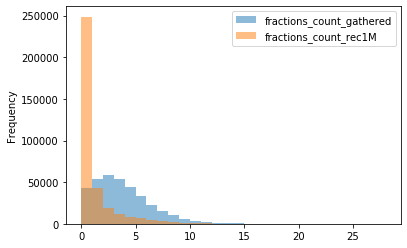

In [28]:
test[['fractions_count_gathered', 'fractions_count_rec1M']].plot.hist(bins=28, alpha=0.5)

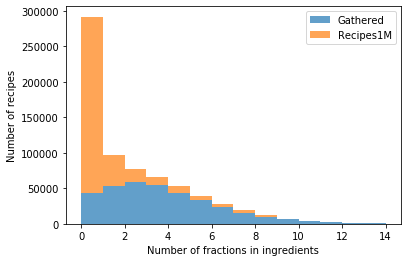

In [29]:
data = [
    test.fractions_count_gathered,
    test.fractions_count_rec1M
]
hist(data, bins=range(0, 15), alpha=0.7, stacked=True, label=['Gathered', 'Recipes1M'])
plt.legend()
plt.ylabel("Number of recipes")
plt.xlabel("Number of fractions in ingredients")
plt.savefig('fractions-stacked.png', dpi=600)

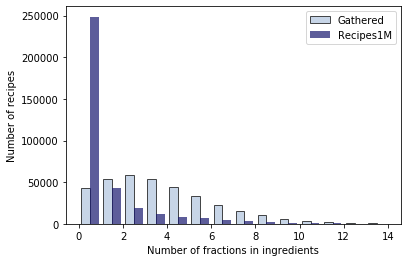

In [30]:
data = [
    test.fractions_count_gathered,
    test.fractions_count_rec1M
]
n, beans, patches = hist(data, bins=range(0, 15), alpha=0.7, stacked=False, label=['Gathered', 'Recipes1M'], color=['lightsteelblue', 'midnightblue'])
for p in patches[0]:
    p.set_ec('black')
#     p.set_hatch('///')
# for p in patches[1]:
#     p.set_hatch('\\\\')
plt.legend()
plt.ylabel("Number of recipes")
plt.xlabel("Number of fractions in ingredients")
tikzplotlib.save('fractions-not-stacked.tex')
plt.savefig('fractions-not-stacked.png', dpi=600)

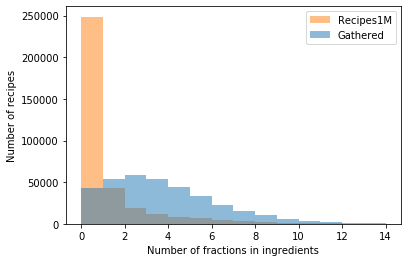

In [31]:
data = [
    test.fractions_count_gathered,
    test.fractions_count_rec1M
]
hist(data, bins=range(0, 15), alpha=0.5, histtype='stepfilled', label=['Gathered', 'Recipes1M'])
plt.legend()
plt.ylabel("Number of recipes")
plt.xlabel("Number of fractions in ingredients")
plt.savefig('fractions-stepfilled.png', dpi=600)

In [32]:
strange = test.loc[test.apply(lambda row: row.fractions_count_gathered==0 and row.fractions_count_rec1M==1, axis=1)][['ingredients_gathered', 'ingredients_rec1M', 'link']]
strange   

,ingredients_gathered,ingredients_rec1M,link
53608,"[6 small avocados, 1 (16 ounce) container sour...","[4 avocados, 1 (16 ounce) container sour cream...",www.food.com/recipe/casa-ole-green-sauce-375991
297154,[2 cups plain 2% reduced-fat Greek yogurt],"[2 cups plain 2% reduced-fat Greek yogurt, 3/4...",www.myrecipes.com/recipe/almond-granola-greek-...
297161,"[1 cup low-fat buttermilk, 3 tablespoons veget...","[1 cup low-fat buttermilk, 3 tablespoons veget...",www.myrecipes.com/recipe/multigrain-pancakes
297252,"[2 tablespoons hot water, 1 tablespoon red win...","[1/4 cup Catalonian Pepper and Nut Sauce, 2 ta...",www.myrecipes.com/recipe/catalonian-salad-with...
297343,"[10 (6-ounce) grouper fillets, 5 teaspoons can...","[10 (6-ounce) grouper fillets, 1/4 cup Cajun S...",www.myrecipes.com/recipe/blackened-grouper
297754,[1 pound reduced-fat extrafirm water-packed to...,[1 pound reduced-fat extrafirm water-packed to...,www.myrecipes.com/recipe/ginger-sesame-grilled...
298448,[9 tablespoons crumbled queso fresco],"[6 Arepas, 1 1/2 cups Simple Black Beans, rehe...",www.myrecipes.com/recipe/arepas-with-savory-to...
299709,"[4 cups gourmet salad greens, 2 cups thinly sl...","[4 cups gourmet salad greens, 2 cups thinly sl...",www.myrecipes.com/recipe/mixed-greens-nectarin...
303550,[1 (18-ounce) package refrigerated sugar cooki...,[1 (18-ounce) package refrigerated sugar cooki...,www.myrecipes.com/recipe/fresh-fruit-pizza-wit...
310503,"[1 whole Sheet Puffed Pastry, Thawed And Cut I...","[1 whole Sheet Puffed Pastry, Cut Into Half Or...",tastykitchen.com/recipes/desserts/quick-and-ea...


In [33]:
test.loc[test.apply(lambda row: row.fractions_count_gathered > row.fractions_count_rec1M, axis=1)].shape

(256626, 11)

In [34]:
test.loc[test.apply(lambda row: row.fractions_count_gathered < row.fractions_count_rec1M, axis=1)].shape

(134, 11)

In [35]:
test.loc[test.apply(lambda row: row.fractions_count_gathered == row.fractions_count_rec1M, axis=1)].shape

(93381, 11)

In [36]:
myrecipes = test.loc[test.link.map(lambda x: 'myrecipes' in x)]
myrecipes.loc[myrecipes.apply(lambda row: len(row.ingredients_gathered) < len(row.ingredients_rec1M), axis=1)].shape

(380, 11)

In [37]:
test.loc[test.apply(lambda row: len(row.ingredients_gathered) < len(row.ingredients_rec1M), axis=1)].shape

(880, 11)